Step 1: Build a neural network that will act as a a sign language classifier. The goal is to produce a model that accepts a picture of a hand as input and outputs a letter.

In [72]:
#Import necessary dependencies#
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(context='notebook', style='whitegrid', palette='viridis')

from sklearn.metrics import confusion_matrix

In [65]:
#Let's import the dataset#
train_df = pd.read_csv("/home/kiri/ASL_Translator/Data/sign_mnist_train/sign_mnist_train.csv")
test_df = pd.read_csv("/home/kiri/ASL_Translator/Data/sign_mnist_test/sign_mnist_test.csv")

#Print data frames to confirm we've pulled the correct things into the python code#
#print (train_df)
#print (test_df)

y_train = train_df['label']
y_test = test_df['label']
train_df.drop(['label'], axis=1, inplace=True)
test_df.drop(['label'], axis=1, inplace=True)

In [66]:
#Reshape data set
x_train = train_df.values.reshape(train_df.shape[0], 28,28,1)
x_test = test_df.values.reshape(test_df.shape[0], 28,28,1)
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)


x_train shape: (27455, 28, 28, 1)
x_test shape: (7172, 28, 28, 1)


/tmp/ipykernel_22312/3006423818.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


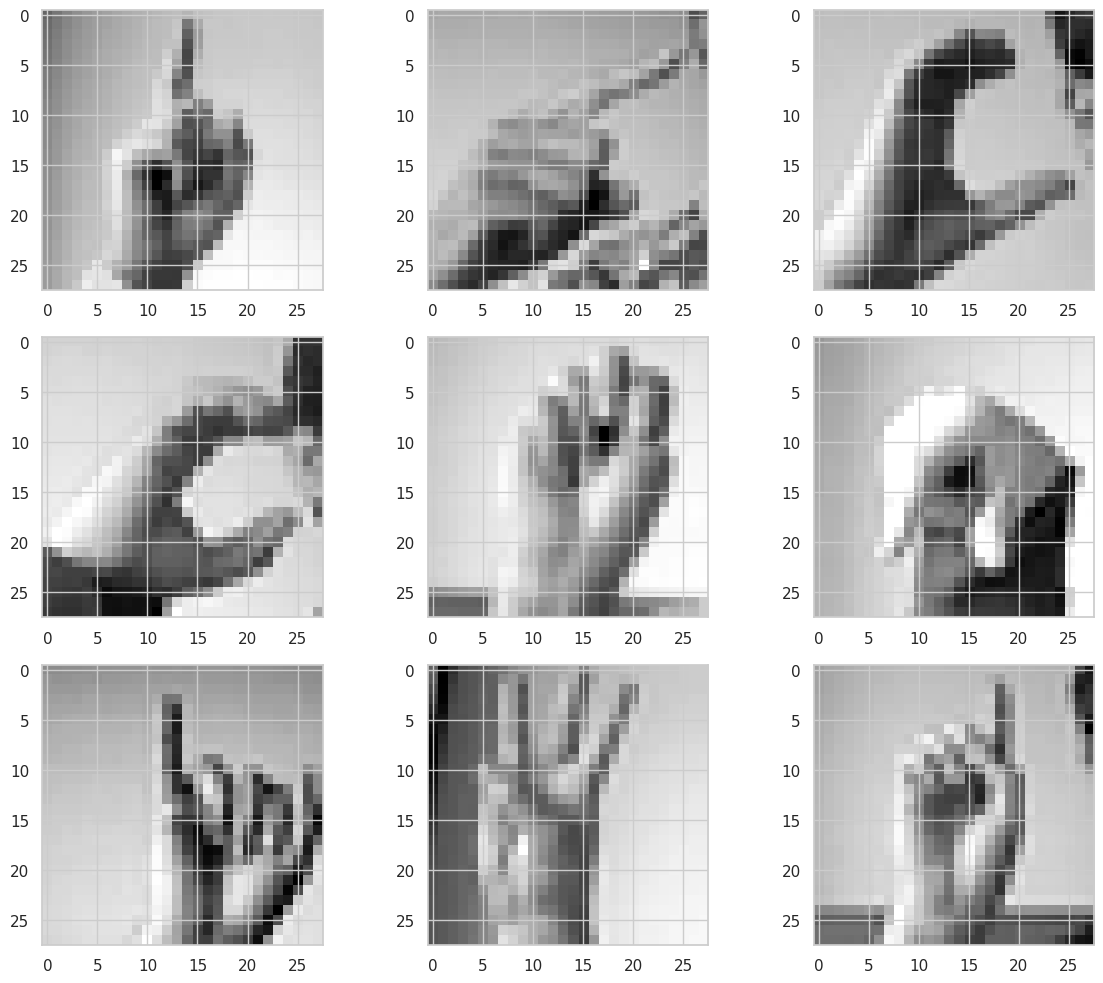

In [67]:
#Plot the first 9 images in the data set#
f, ax = plt.subplots(3,3) 
f.set_size_inches(12, 10)
k = 0
for i in range(3):
    for j in range(3):
        ax[i,j].imshow(x_train[k].reshape(28, 28) , cmap = "gray")
        k += 1
    plt.tight_layout()

This data set is rather small, so let's generate more input by randomly changing the data we do have.

In [68]:
data_augmentation = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range = 0.2, 
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
)
data_augmentation.fit(x_train)
data_scaled = ImageDataGenerator(rescale=1./255)
x_train, x_test = data_augmentation.flow(x_train, y_train, batch_size=128), data_scaled.flow(x_test, y_test)

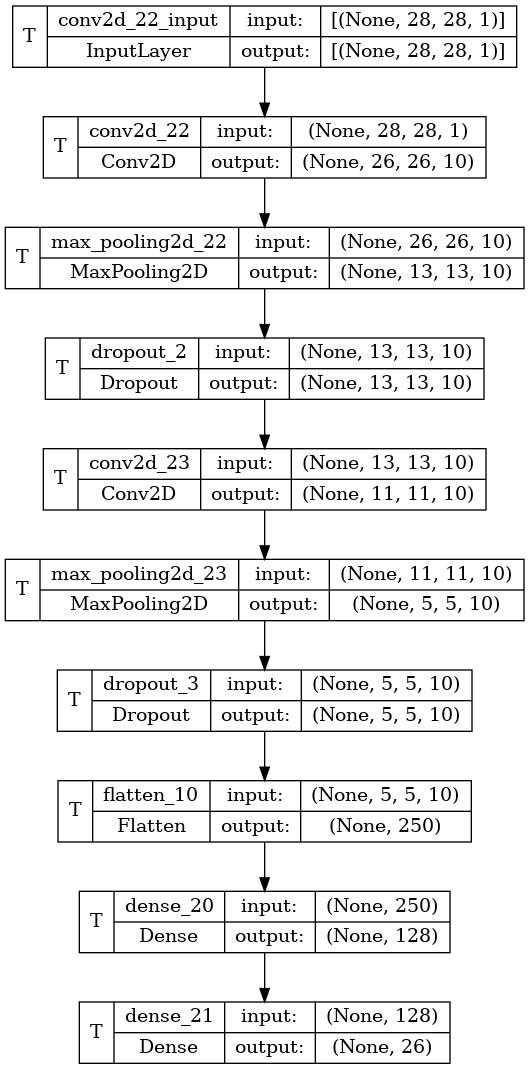

In [69]:
#Build the neural network why build it like this? see Khan and Gondhi, http://cs229.stanford.edu/proj2021spr/report2/81997848.pdf #
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(10, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2), Dropout(0.2),
    tf.keras.layers.Conv2D(10, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax') 
])

#these lines of code tell python to plot a figure in the notebook, and then save this as 'model.jpg' showing the neural network#
image_size = (28, 28)
keras.utils.plot_model(model, to_file="model.jpg", show_shapes=True, show_trainable=True)


In [70]:
#Train the model#
epochs=100
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(x_train, validation_data=x_test, epochs=epochs)

Epoch 1/100
215/215 [==============================] - 92s 409ms/step - loss: 3.1272 - accuracy: 0.0719 - val_loss: 2.9141 - val_accuracy: 0.1333
Epoch 2/100
215/215 [==============================] - 85s 395ms/step - loss: 2.9082 - accuracy: 0.1335 - val_loss: 2.5169 - val_accuracy: 0.2605
Epoch 3/100
215/215 [==============================] - 114s 527ms/step - loss: 2.6927 - accuracy: 0.1867 - val_loss: 2.2334 - val_accuracy: 0.3477
Epoch 4/100
215/215 [==============================] - 122s 569ms/step - loss: 2.5091 - accuracy: 0.2325 - val_loss: 2.0631 - val_accuracy: 0.3466
Epoch 5/100
215/215 [==============================] - 137s 635ms/step - loss: 2.3652 - accuracy: 0.2669 - val_loss: 1.8268 - val_accuracy: 0.4329
Epoch 6/100
215/215 [==============================] - 137s 638ms/step - loss: 2.2635 - accuracy: 0.2982 - val_loss: 1.7247 - val_accuracy: 0.4509
Epoch 7/100
215/215 [==============================] - 126s 585ms/step - loss: 2.1652 - accuracy: 0.3202 - val_loss: 1.5

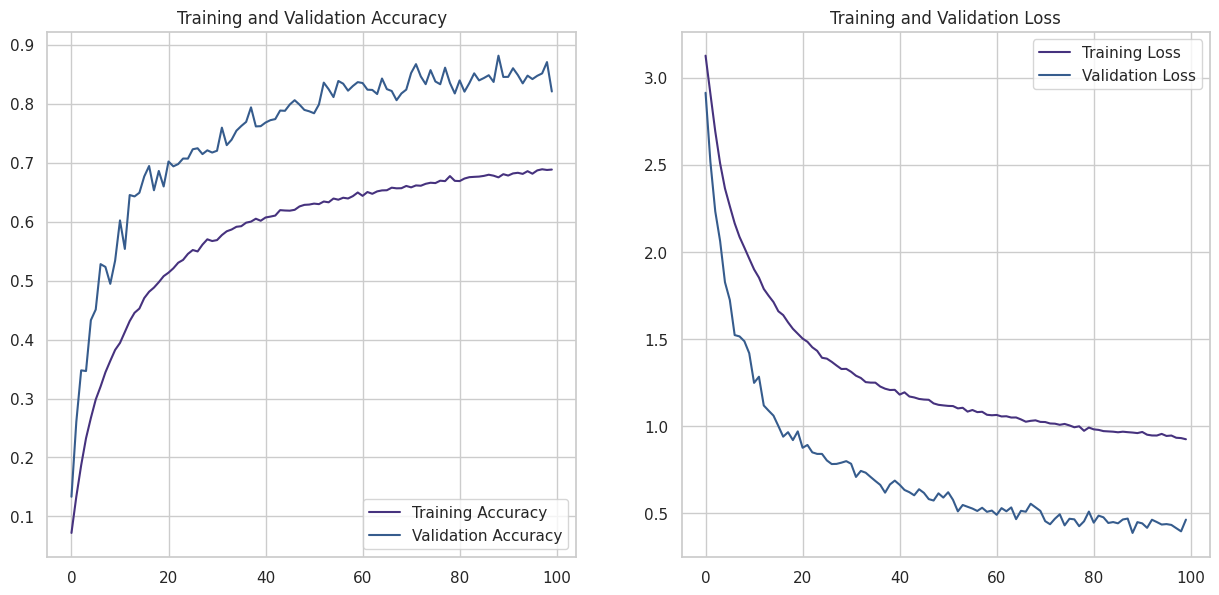

In [91]:
accuracy, val_accuracy = history.history['accuracy'], history.history['val_accuracy']
loss, val_loss = history.history['loss'], history.history['val_loss']
epochs_trained = range(len(accuracy))

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_trained, accuracy, label='Training Accuracy')
plt.plot(epochs_trained, val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_trained, loss, label='Training Loss')
plt.plot(epochs_trained, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('Accuracy, Loss.png')

In [92]:
score = model.evaluate(x_test)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])
df_test = pd.read_csv('/home/kiri/ASL_Translator/Data/sign_mnist_test.csv')
y_test = df_test['label']
x_test = test_df.values.reshape(test_df.shape[0], 28,28,1)

df_test.drop(['label'], axis=1, inplace=True)
print("x_test shape:", x_test.shape)
y_pred = np.argmax(model.predict(x_test), axis=1)


225/225 [==============================] - 2s 8ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Test Loss: 0.0
Test Accuracy: 0.0
x_test shape: (7172, 28, 28, 1)
225/225 [==============================] - 3s 14ms/step


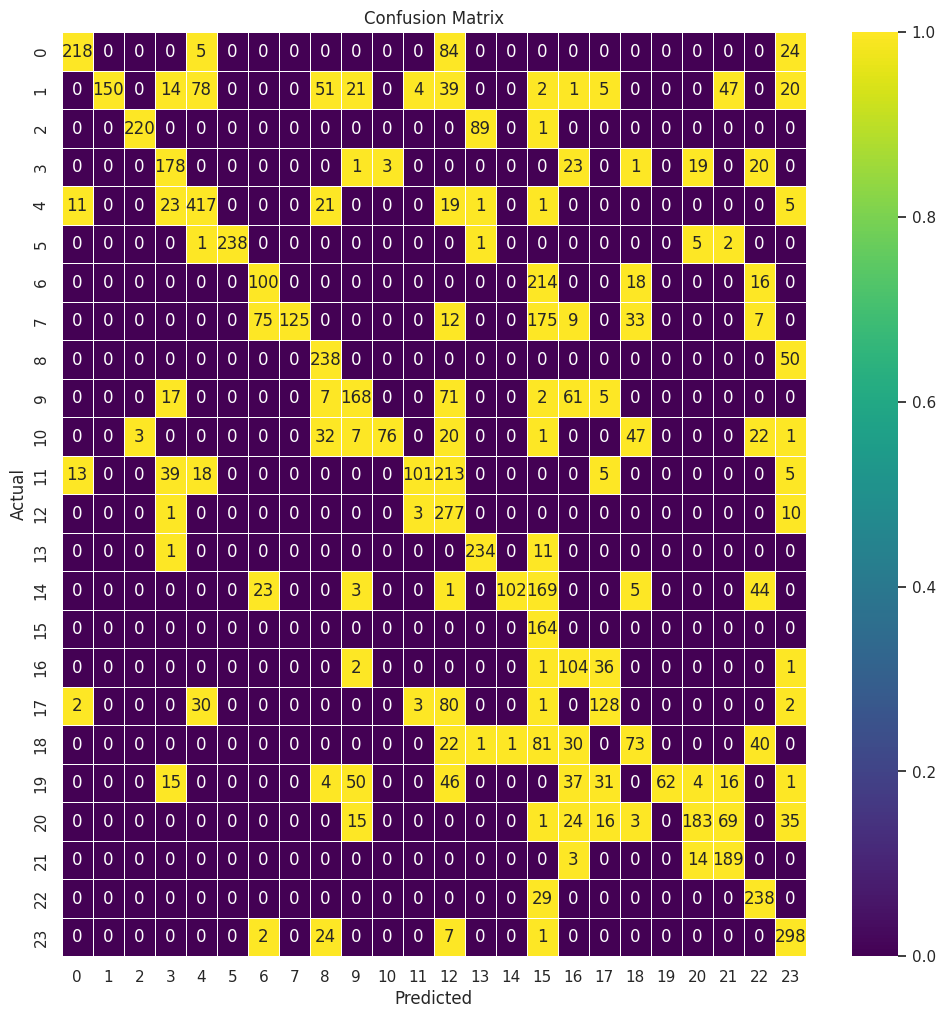

<Figure size 640x480 with 0 Axes>

In [98]:
plt.figure(figsize=(12, 12))
sns.heatmap(confusion_matrix(y_test, y_pred), cmap='viridis', annot=True, linewidth=.5, fmt='g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
plt.savefig('confusion.png')
